In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-playstore/googleplaystore.csv


# The below dataset contains data about apps available on Google Playstore of different genres. The information collected includes App Name, Category, Ratings, Number of Reviews, Size of app, Number of installs, Type, Price, Content Rating, Genres, Last Updated, Current Version and Android Version

In [70]:
pstore = pd.read_csv("/kaggle/input/google-playstore/googleplaystore.csv")
pstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### If we look at the data, then we could understand that there is no use of Current Version and Android version columns. So, in cleaning process, we would drop them

In [71]:
pstore.drop(['Current Ver','Android Ver'], inplace= True, axis=1)
pstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015"


In [72]:
pstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
dtypes: float64(1), object(10)
memory usage: 931.8+ KB


#### From the above dataframe, it is visible that the dataset is not cleaned for analysis purpose. The column names needs to be changed for better understanding, the datatypes needs to be changed, and NULL values has to be dealt with for generating insights.

In [73]:
pstore.rename(columns={'App':'App Name','Reviews':'Number of Reviews','Size':'Size in MB','Installs':'Number of Installs(approx)','Type':'Free/Paid','Price':'Price in $'}, inplace=True)
pstore

,App Name,Category,Rating,Number of Reviews,Size in MB,Number of Installs(approx),Free/Paid,Price in $,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015"


In [74]:
pstore['Size in MB'] = pstore['Size in MB'].str.replace('M', '')
pstore['Size in MB'] = pstore['Size in MB'].str.replace('k', '')
pstore['Size in MB'] = pstore['Size in MB'].str.replace('+', '')
pstore['Size in MB'] = pstore['Size in MB'].str.replace(',', '')
pstore['Size in MB'] = pstore['Size in MB'].str.replace('Varies with device', '50')
pstore['Size in MB'] = pstore['Size in MB'].astype(float)
pstore

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,App Name,Category,Rating,Number of Reviews,Size in MB,Number of Installs(approx),Free/Paid,Price in $,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,50.0,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015"


In [75]:
pstore['Number of Installs(approx)'] = pstore['Number of Installs(approx)'].str.replace('+', '')
pstore['Number of Installs(approx)'] = pstore['Number of Installs(approx)'].str.replace(',', '')
pstore['Number of Installs(approx)'] = pstore['Number of Installs(approx)'].str.replace('Free', '2000')
pstore['Number of Installs(approx)'] = pstore['Number of Installs(approx)'].astype(int)
pstore

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,App Name,Category,Rating,Number of Reviews,Size in MB,Number of Installs(approx),Free/Paid,Price in $,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0,Everyone,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,50.0,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015"


In [76]:
pstore['Free/Paid'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [77]:
pstore[pstore['Free/Paid']=='0']

,App Name,Category,Rating,Number of Reviews,Size in MB,Number of Installs(approx),Free/Paid,Price in $,Content Rating,Genres,Last Updated
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000.0,2000,0,Everyone,NaN,"February 11, 2018",1.0.19


In [78]:
pstore[pstore["Free/Paid"].isna()]

,App Name,Category,Rating,Number of Reviews,Size in MB,Number of Installs(approx),Free/Paid,Price in $,Content Rating,Genres,Last Updated
9148,Command & Conquer: Rivals,FAMILY,NaN,0,50.0,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018"


In [79]:
pstore['Free/Paid'] = pstore['Free/Paid'].fillna('Free')
pstore['Free/Paid'] = pstore['Free/Paid'].str.replace('0','Free')
pstore

,App Name,Category,Rating,Number of Reviews,Size in MB,Number of Installs(approx),Free/Paid,Price in $,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0,Everyone,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,50.0,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015"


In [80]:
pstore['Free/Paid'].unique()

array(['Free', 'Paid'], dtype=object)

In [81]:
pstore['Number of Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [82]:
pstore['Price in $'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [83]:
pstore[pstore['Price in $']=='Everyone']

,App Name,Category,Rating,Number of Reviews,Size in MB,Number of Installs(approx),Free/Paid,Price in $,Content Rating,Genres,Last Updated
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000.0,2000,Free,Everyone,NaN,"February 11, 2018",1.0.19


In [84]:
pstore['Price in $'] = pstore['Price in $'].str.replace('Everyone','0')
pstore['Price in $'] = pstore['Price in $'].str.replace('$','')
pstore['Price in $'].astype(float)
pstore

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,App Name,Category,Rating,Number of Reviews,Size in MB,Number of Installs(approx),Free/Paid,Price in $,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0,Everyone,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,50.0,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015"


In [85]:
pstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App Name                    10841 non-null  object 
 1   Category                    10841 non-null  object 
 2   Rating                      9367 non-null   float64
 3   Number of Reviews           10841 non-null  object 
 4   Size in MB                  10841 non-null  float64
 5   Number of Installs(approx)  10841 non-null  int64  
 6   Free/Paid                   10841 non-null  object 
 7   Price in $                  10841 non-null  object 
 8   Content Rating              10840 non-null  object 
 9   Genres                      10841 non-null  object 
 10  Last Updated                10841 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 931.8+ KB


In [86]:
pstore['Number of Reviews'] = pstore['Number of Reviews'].str.replace('3.0M','3000000')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [87]:
pstore['Number of Reviews'] = pstore['Number of Reviews'].astype(int)

In [88]:
pstore['Price in $'] = pstore['Price in $'].astype(float)
pstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App Name                    10841 non-null  object 
 1   Category                    10841 non-null  object 
 2   Rating                      9367 non-null   float64
 3   Number of Reviews           10841 non-null  int64  
 4   Size in MB                  10841 non-null  float64
 5   Number of Installs(approx)  10841 non-null  int64  
 6   Free/Paid                   10841 non-null  object 
 7   Price in $                  10841 non-null  float64
 8   Content Rating              10840 non-null  object 
 9   Genres                      10841 non-null  object 
 10  Last Updated                10841 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 931.8+ KB


In [89]:
pstore['Last Updated'] = pd.to_datetime(pstore['Last Updated'], errors='coerce')
pstore

,App Name,Category,Rating,Number of Reviews,Size in MB,Number of Installs(approx),Free/Paid,Price in $,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,50.0,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19


In [90]:
pstore['Last Updated'].unique()

array(['2018-01-07T00:00:00.000000000', '2018-01-15T00:00:00.000000000',
       '2018-08-01T00:00:00.000000000', ...,
       '2014-01-20T00:00:00.000000000', '2014-02-16T00:00:00.000000000',
       '2014-03-23T00:00:00.000000000'], dtype='datetime64[ns]')

In [91]:
pstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   App Name                    10841 non-null  object        
 1   Category                    10841 non-null  object        
 2   Rating                      9367 non-null   float64       
 3   Number of Reviews           10841 non-null  int64         
 4   Size in MB                  10841 non-null  float64       
 5   Number of Installs(approx)  10841 non-null  int64         
 6   Free/Paid                   10841 non-null  object        
 7   Price in $                  10841 non-null  float64       
 8   Content Rating              10840 non-null  object        
 9   Genres                      10841 non-null  object        
 10  Last Updated                10840 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)


In [92]:
pstore['Rating'].mean()

4.193338315362443

In [93]:
pstore['Rating'].fillna(4.1,inplace=True)
pstore

,App Name,Category,Rating,Number of Reviews,Size in MB,Number of Installs(approx),Free/Paid,Price in $,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06
10838,Parkinson Exercices FR,MEDICAL,4.1,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,50.0,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19


In [94]:
pstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   App Name                    10841 non-null  object        
 1   Category                    10841 non-null  object        
 2   Rating                      10841 non-null  float64       
 3   Number of Reviews           10841 non-null  int64         
 4   Size in MB                  10841 non-null  float64       
 5   Number of Installs(approx)  10841 non-null  int64         
 6   Free/Paid                   10841 non-null  object        
 7   Price in $                  10841 non-null  float64       
 8   Content Rating              10840 non-null  object        
 9   Genres                      10841 non-null  object        
 10  Last Updated                10840 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)


#### Checking if the data has any outliers

In [95]:
pstore.describe()

,Rating,Number of Reviews,Size in MB,Number of Installs(approx),Price in $
count,10841.000000,1.084100e+04,10841.000000,1.084100e+04,10841.000000
mean,4.180648,4.443887e+05,39.151287,1.546291e+07,1.027273
std,0.500581,2.927728e+06,91.399335,8.502557e+07,15.948971
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,6.800000,1.000000e+03,0.000000
50%,4.200000,2.094000e+03,20.000000,1.000000e+05,0.000000
75%,4.500000,5.479800e+04,50.000000,5.000000e+06,0.000000
max,19.000000,7.815831e+07,1020.000000,1.000000e+09,400.000000


#### There is an outlier detected in Rating column with max rating being 19.0 which technically isn't possible

In [96]:
pstore[pstore['Rating']>5.0]

,App Name,Category,Rating,Number of Reviews,Size in MB,Number of Installs(approx),Free/Paid,Price in $,Content Rating,Genres,Last Updated
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000,1000.0,2000,Free,0.0,NaN,"February 11, 2018",NaT


In [97]:
pstore['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [98]:
pstore.loc[10472, 'Category'] = 'PHOTOGRAPHY'
pstore.loc[10472, 'Rating'] = 1.9
pstore.loc[10472, 'Size in MB'] = 30.0
pstore.loc[10472, 'Number of Reviews'] = 300
pstore.loc[10472, 'Content Rating'] = 'Everyone'
pstore.loc[10472, 'Genres'] = 'Photography'
pstore.loc[10472, 'Last Updated'] = '2018-02-11'

pstore.loc[10472]

App Name                      Life Made WI-Fi Touchscreen Photo Frame
Category                                                  PHOTOGRAPHY
Rating                                                            1.9
Number of Reviews                                                 300
Size in MB                                                       30.0
Number of Installs(approx)                                       2000
Free/Paid                                                        Free
Price in $                                                        0.0
Content Rating                                               Everyone
Genres                                                    Photography
Last Updated                                      2018-02-11 00:00:00
Name: 10472, dtype: object

In [99]:
pstore

,App Name,Category,Rating,Number of Reviews,Size in MB,Number of Installs(approx),Free/Paid,Price in $,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06
10838,Parkinson Exercices FR,MEDICAL,4.1,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,50.0,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19


In [100]:
pstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   App Name                    10841 non-null  object        
 1   Category                    10841 non-null  object        
 2   Rating                      10841 non-null  float64       
 3   Number of Reviews           10841 non-null  int64         
 4   Size in MB                  10841 non-null  float64       
 5   Number of Installs(approx)  10841 non-null  int64         
 6   Free/Paid                   10841 non-null  object        
 7   Price in $                  10841 non-null  float64       
 8   Content Rating              10841 non-null  object        
 9   Genres                      10841 non-null  object        
 10  Last Updated                10841 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)


In [101]:
pstore.describe()

,Rating,Number of Reviews,Size in MB,Number of Installs(approx),Price in $
count,10841.000000,1.084100e+04,10841.000000,1.084100e+04,10841.000000
mean,4.179070,4.441120e+05,39.061812,1.546291e+07,1.027273
std,0.480415,2.927629e+06,90.932224,8.502557e+07,15.948971
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,6.800000,1.000000e+03,0.000000
50%,4.200000,2.094000e+03,20.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,50.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1020.000000,1.000000e+09,400.000000


In [102]:
pstore

,App Name,Category,Rating,Number of Reviews,Size in MB,Number of Installs(approx),Free/Paid,Price in $,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06
10838,Parkinson Exercices FR,MEDICAL,4.1,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,50.0,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19


#### Now the data is believed to be cleaned, so analyzing the data for generating insights from the dataset

In [104]:
pstore['Category'].nunique()

33

## 1. Which are the top 10 app categories that are being installed in high numbers?

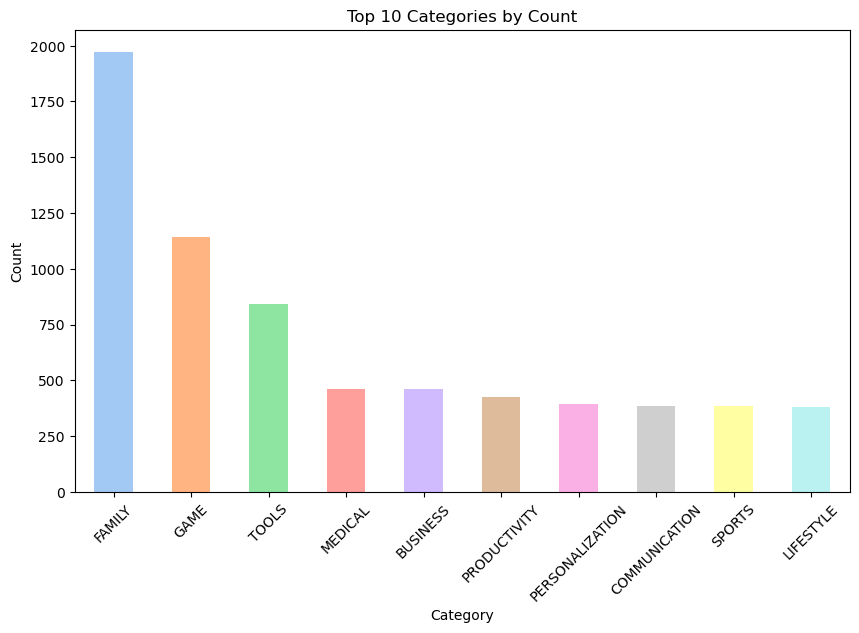

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

category_counts = pstore['Category'].value_counts()

top_10_categories = category_counts.head(10)

colors = sns.color_palette('pastel')

plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='bar', color=colors)
plt.title('Top 10 Categories by Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### From the above graph, it could be seen that the apps from 'Family' category is being installed at higher rate than the others

## 2. Does number of reviews on the app have any impact on the Ratings?

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


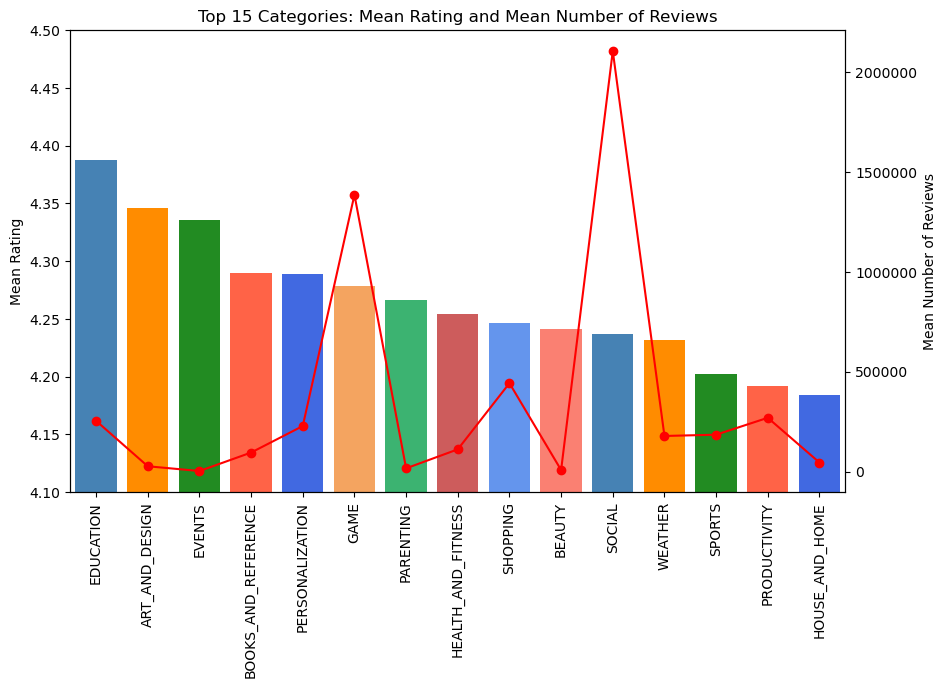

In [113]:
from matplotlib.ticker import FormatStrFormatter

category_stats = pstore.groupby('Category').agg({'Rating': 'mean', 'Number of Reviews': 'mean'}).reset_index()

category_stats.sort_values(by='Rating', ascending=False, inplace=True)

top_15_categories = category_stats.head(15)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

colors = ['steelblue', 'darkorange', 'forestgreen', 'tomato', 'royalblue', 'sandybrown', 'mediumseagreen', 'indianred', 'cornflowerblue', 'salmon']
ax1.bar(top_15_categories['Category'], top_15_categories['Rating'], color=colors)
ax1.set_ylabel('Mean Rating')
ax1.set_ylim(4.1, 4.5)

ax2.plot(top_15_categories['Category'], top_15_categories['Number of Reviews'], color='red', marker='o')
ax2.set_ylabel('Mean Number of Reviews')
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax1.set_xticklabels(top_15_categories['Category'], rotation='vertical')

ax1.set_xlim(-0.5, len(top_15_categories)-0.5)

plt.title('Top 15 Categories: Mean Rating and Mean Number of Reviews')

plt.show()

#### From the above plot, it could be said that there is no relation between ratings and number of reviews given by the customers
#### The Category - 'Social' seems to be having higher number of reviews

## 3. Is there any relation between ratings and size of the app?

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


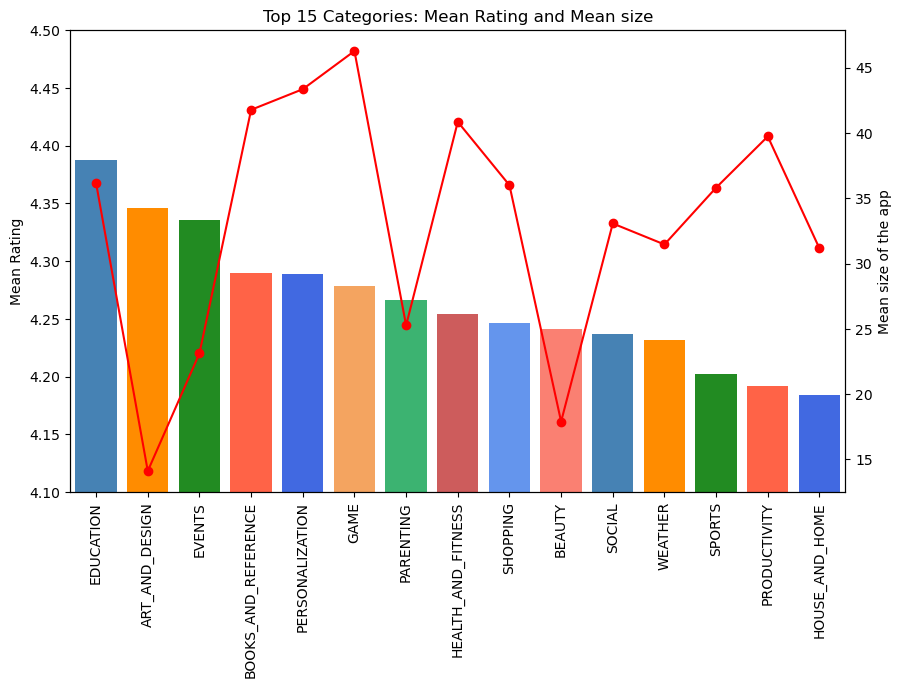

In [115]:
category_stats1 = pstore.groupby('Category').agg({'Rating': 'mean', 'Size in MB': 'mean'}).reset_index()

category_stats1.sort_values(by='Rating', ascending=False, inplace=True)

top_15_categories1 = category_stats1.head(15)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

colors = ['steelblue', 'darkorange', 'forestgreen', 'tomato', 'royalblue', 'sandybrown', 'mediumseagreen', 'indianred', 'cornflowerblue', 'salmon']
ax1.bar(top_15_categories1['Category'], top_15_categories1['Rating'], color=colors)
ax1.set_ylabel('Mean Rating')
ax1.set_ylim(4.1, 4.5)

ax2.plot(top_15_categories1['Category'], top_15_categories1['Size in MB'], color='red', marker='o')
ax2.set_ylabel('Mean size of the app')
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax1.set_xticklabels(top_15_categories1['Category'], rotation='vertical')

ax1.set_xlim(-0.5, len(top_15_categories1)-0.5)

plt.title('Top 15 Categories: Mean Rating and Mean size')

plt.show()

#### It could be concluded that there is no direct relationship between rating and size of the app to impact the ratings
#### The 'Game' category apps seems to have higher size for downloading the app

## 4. What are the ratings of the apps that are paid? Is there any impact on the pricing of the apps to that of ratings?

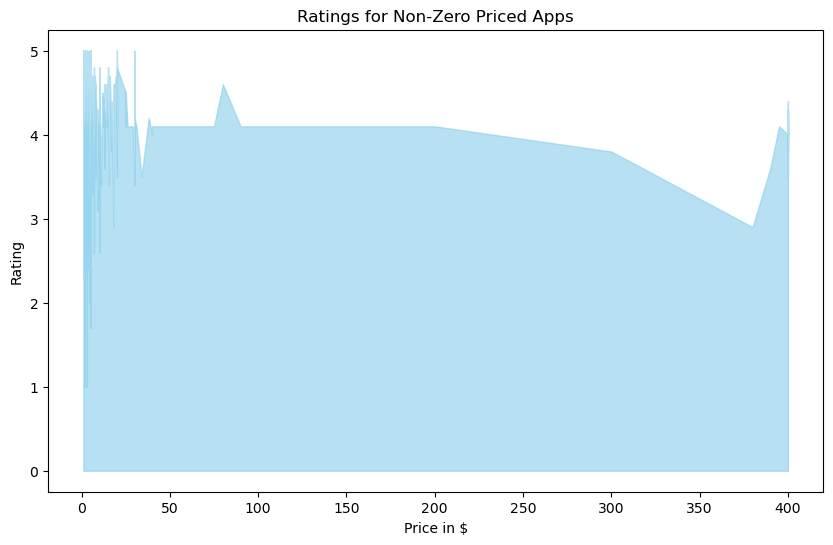

In [121]:
filtered_data = pstore[pstore['Price in $'] != 0]

# Sort the filtered data by price in ascending order
filtered_data.sort_values(by='Price in $', inplace=True)

# Create the area chart
plt.figure(figsize=(10, 6))
plt.fill_between(filtered_data['Price in $'], filtered_data['Rating'], color='skyblue', alpha=0.6)
plt.xlabel('Price in $')
plt.ylabel('Rating')
plt.title('Ratings for Non-Zero Priced Apps')
plt.show()

#### The apps with lower cost does seem to have higher rating than that of highly priced apps

## 5. How is content of the apps spread across the playstore?

In [122]:
pstore['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

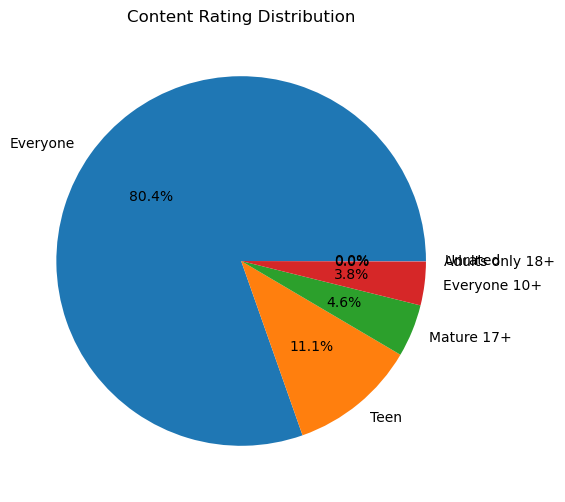

In [123]:
content_rating_counts = pstore['Content Rating'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(content_rating_counts, labels=content_rating_counts.index, autopct='%1.1f%%')
plt.title('Content Rating Distribution')
plt.show()

#### General apps for Everyone occupies around 4/5th of the content in the playstore.